##Laboratorio 8

In [143]:
import numpy as np

from sklearn.datasets import make_moons
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler


from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

Tenemos que el dataset make_moons consiste en un conjunto de datos con 2 caracteristicas o features, los cuales generan 2 semicirculos intercalados, esto podemos visualizarlo a continuacion:

In [144]:
X, y = make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=None)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

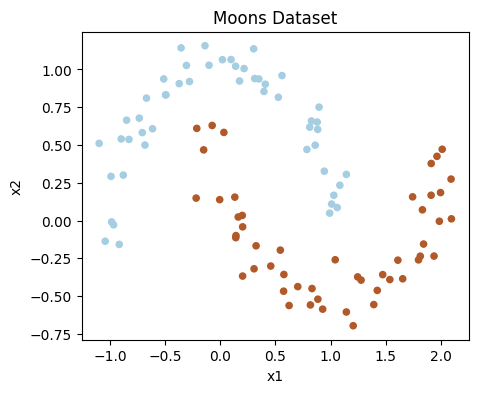

In [145]:
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.title("Moons Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Ahora importamos las librerias correspondientes de tensorflow y keras

In [146]:
!pip install --upgrade keras

In [147]:
import os

# This guide can only be run with the TF backend.
os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical

In [148]:
class MoonClassifier:
    def __init__(self, input_shape, learnining_rate = 0.01):
      self.input_shape = input_shape
      self.learnining_rate = learnining_rate
      self.model = self._build_model()

    def _build_model(self):
      model = keras.Sequential([
          keras.layers.Dense(16, activation='relu', input_shape=(self.input_shape,)),
          keras.layers.Dense(16, activation='relu'),
          keras.layers.Dense(2, activation='softmax')
      ])
      model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(learning_rate=self.learnining_rate),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="acc"),
        ],
      )
      return model


    def train(self, X_train, y_train, epochs=100, batch_size=32):
      self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

    def evaluate(self, X_test, y_test):
      loss, accuracy = self.model.evaluate(X_test, y_test, verbose=0)
      print(f"Test Accuracy: {accuracy:.2f}")
      return accuracy

    def predict(self, X):
      return np.argmax(self.model.predict(X), axis=1)

In [149]:
input_dim = X_train.shape[1]
moon_classifier = MoonClassifier(input_shape=input_dim)
moon_classifier.train(X_train, y_train, epochs=50, batch_size=16)
moon_classifier.evaluate(X_test, y_test)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.6292 - loss: 0.6621
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.7314 - loss: 0.5231
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.8337 - loss: 0.4246
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.8424 - loss: 0.3441
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.8104 - loss: 0.3262 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8399 - loss: 0.3359 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.8181 - loss: 0.3691 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8615 - loss: 0.2600
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.8828 - loss: 0.2644 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.8833 - loss: 0.2764
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.8842 - loss: 0.2387
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.8903 - loss: 0.2305
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.9281 - loss:

1.0

9008/9008 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step


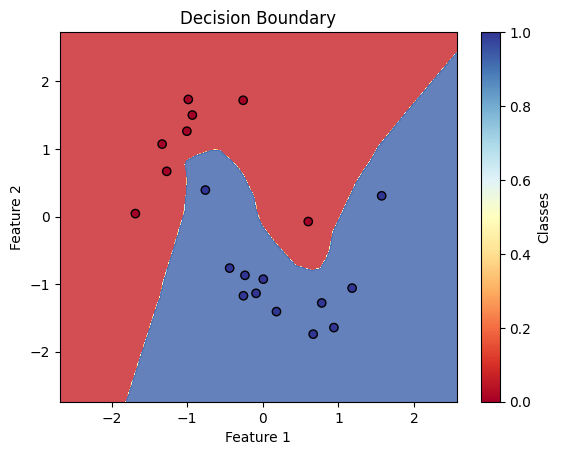

In [150]:
def plot_decision_boundary(classifier, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = classifier.predict(grid_points)

    Z = predictions.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.colorbar(scatter, label="Classes")
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(moon_classifier, X_test, y_test)  # Usa directamente y_test

2. para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

Este dataset consiste en un conjunto de numeros del 1 al 10 escritos a mano

In [151]:
digits = load_digits()
X = digits.data
y = digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.reshape(-1, 1)).toarray()


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

Podemos visualizarlo de la siguiente forma:

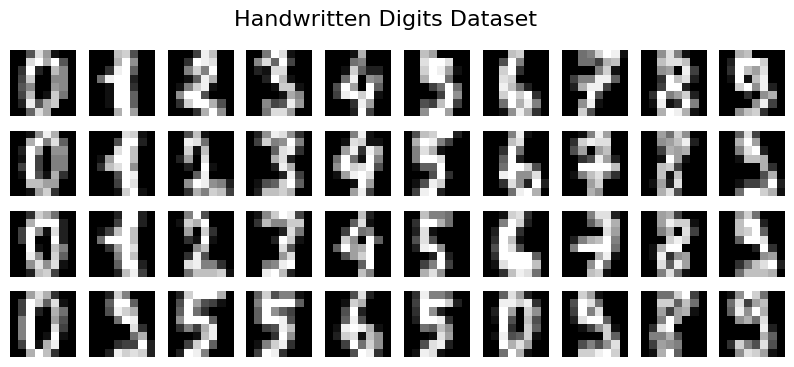

In [152]:
fig, axes = plt.subplots(4, 10, figsize=(10, 4))
plt.suptitle("Handwritten Digits Dataset", fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.axis('off')

plt.show()


In [158]:
from tensorflow.keras.optimizers import Adam

class NumberRecog:
    def __init__(self, input_dim, output_dim, learning_rate=0.001):
      self.input_dim = input_dim
      self.output_dim = output_dim
      self.learning_rate = learning_rate
      self.model = self._build_model()

    def _build_model(self):
      model = keras.Sequential([
          keras.layers.Dense(64, activation='relu', input_shape=(self.input_dim,)),
          keras.layers.Dense(32, activation='relu'),
          keras.layers.Dense(10, activation='softmax')
      ])
      model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate),
          loss=keras.losses.CategoricalCrossentropy(),
          metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")]
      )
      return model

    def train(self, X_train, y_train, epochs=20, batch_size=32):
      self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

    def evaluate(self, X_test, y_test):
        result = self.model.evaluate(X_test, y_test, verbose=0)
        loss, accuracy = result if isinstance(result, (list, tuple)) else (result, None)
        print(f"Test Accuracy: {accuracy:.2f}" if accuracy else f"Loss: {loss:.2f}")
        return result

    def predict(self, X):
      return np.argmax(self.model.predict(X), axis=1)

In [159]:
nr = NumberRecog(input_dim=X_train.shape[1], output_dim=y_train.shape[1])

nr.train(X_train, y_train, epochs=20, batch_size=32)
loss, accuracy = nr.evaluate(X_test, y_test)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3162 - loss: 2.1384
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7299 - loss: 1.1233
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8669 - loss: 0.5895
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9290 - loss: 0.3541
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9582 - loss: 0.2220
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9687 - loss: 0.1592
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9741 - loss: 0.1305
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9805 - loss: 0.0966
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9904 - loss: 0.0719
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9952 - loss: 0.0518
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9917 - loss: 0.0537
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9940 - lo

In [160]:
predictions = nr.model.predict(X_test[:5])
print("Predicted Labels:", np.argmax(predictions, axis=1))
print("True Labels:", np.argmax(y_test[:5], axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Labels: [6 9 3 7 2]
True Labels: [6 9 3 7 2]
